# SEMTM0031 - 2024 - Introduction to Financial Technology
# CA2 - Empirical Data Analysis and Hypothesis Testing

Introduction to Financial Technology has continuous assessment (CA) worth 30% of the unit mark. As
part of continuous assessment, students complete two short formative tasks during the first half of
the unit. Feedback will only be given to submissions received on time. Referring to a marking rubric,
feedback will highlight areas that are strong and areas that can be improved. Students will then have
an opportunity to act on feedback before submitting their work for summative assessment. 

+ Release date: Friday 11/10/2024 (Blackboard)

+ Submission: Thursday 24/10/2024 (1pm via Blackboard) 

CA2 is an __individual__ assessment. You must work alone. If you do not submit on time (even if you are one minute late), you will receive no feedback.  

We expect you to spend around 4 hours on this work.

You will work directly within this Jupyter Notebook. When you have completed your work, submit this Notebook.

The first part of this Notebook has code to generate some empirical data using BSE market simulation.

You will add your own code in the second part of the Notebook to analyse the empirical data that you have generated. 

You should also add Markdown sections of text to explain what you are doing and why. Write this in the style of a report.

__MARKING GUIDE__: Marks are available for:

+ accuracy of approach and results; 
+ coding style and comments; 
+ quality and choice of visualisations (be concise - do not present redundant information);
+ technical description of what you are doing and why; 
+ interpretation of results.

### Motivation:

We want to know if ZIP traders generate more profit than ZIC traders in homogeneous and periodic BSE markets with symmetric demand and supply curves.

### Hypothesis:

We first state a null hypothesis (h_0) and alternative hypothesis (h_a). Here, we consider mean profit generated by each trader to be the metric of  'performance'.

+ `h_0: mean_profit(ZIP) <= mean_profit(ZIC)`

+ `h_a: mean_profit(ZIP) > mean_profit(ZIC)`

### Instructions:

You should use BSE to explore this hypothesis. Generate empirical data, perform analysis and summarise your findings.

__Tip__: In the Hypothesis Testing Activity week, you explored methods of visualising and analysing data. You can follow similar methods. 

This is an individual assessment. You must work alone. We expect you to spend around 4 hours on this work.

This Jupyter notebook is in two parts. 
+ In the first part we give you code to generate empricial data. You should __not__ edit the first half of this notebook.

+ In the second part you will write your own code and markdown text to perform data analysis and hypothesis testing. 

When completed, submit the full file to Blackboard. We must be able to run your code.

__IMPORTANT INFORMATION__: 

This worksheet requires `BSE.py`

+ Download latest version BSE from GitHub here: https://github.com/davecliff/BristolStockExchange. ([Click to download latest ZIP archive](https://github.com/davecliff/BristolStockExchange/archive/refs/heads/master.zip))

+ Place file `BSE.py` in the __same folder__ as this Jupyter Notebook so that you can import BSE functions. Otherwise the code in this notebook will not work. Python will throw a `ModuleNotFoundError: No module named 'BSE'`

+ For full details on using BSE, refer to the [BSE wiki](https://github.com/davecliff/BristolStockExchange/wiki).

In [85]:
# Initial Setup:
# Import all the libraries we need

import matplotlib.pyplot as plt
import numpy as np
import csv
import math
import random
import pandas as pd
import seaborn as sns
from scipy import stats

from BSE import market_session

### Configure a BSE Market

The following code contains a function to generate the data you need for CA2.

+ `run_periodic_symmetric_trial(N=1, trader_type='ZIP', end_time=60*10)`

This function configures BSE to run experimental trials. Do not edit this code.

We can use this function to run N trials, configured as homogeneous markets with symmetric supply and demand.

Mean profits for each run are output to a different file. Note that this will create lots of files in your current directory.

In [3]:
'''Run a single BSE experimental trial, configured as homogeneous and periodic market with symmetric demand and supply.

N = number of repeated trials. Default = 1
trader_type = populate market with this type of trading agent. Default = 'ZIP'
end_time = length of simulation. Default = 10 minutes
'''
def run_periodic_symmetric_trial(N=1, trader_type='ZIP', end_time=60*10):
    # 10 minutes per simulation
    start_time = 0
    end_time = 60 * 10

    # Symmetric supply and demand. Price range 80 to 320.
    # Successive price steps between traders fixed.
    chart1_range=(80, 320)

    supply_schedule = [{'from': start_time, 'to': end_time, 'ranges': [chart1_range], 'stepmode': 'fixed'}]
    demand_schedule = [{'from': start_time, 'to': end_time, 'ranges': [chart1_range], 'stepmode': 'fixed'}]

    # Periodic updating at the start of each 'day'. Let's say each 'day' is 60 seconds.
    order_interval = 60
    order_sched = {'sup': supply_schedule, 'dem': demand_schedule,
                'interval': order_interval, 'timemode': 'periodic'}

    # Let's use 10 traders on each side of type trader_type
    sellers_spec = [(trader_type, 10)]
    buyers_spec = sellers_spec
    traders_spec = {'sellers':sellers_spec, 'buyers':buyers_spec}

    # Configure output file settings. This is new for BSE version 28/10/2023.
    # For each data file type, set True to write file data, false to not write file.
    # In this case, we are only interested in average profits per trader. We set all other flags to False.
    dump_flags = {'dump_blotters': False, 'dump_lobs': False, 'dump_strats': False,
              'dump_avgbals': True, 'dump_tape': False}

    # Let us run N sessions/trials of this experiment configuration

    for i in range(N):
        trial_id = trader_type+'_'+str(i)
        verbose = False # Reduce output of BSE (setting True gives lots of output that we do not need)

        # New settings: BSE version 28/10/2023
        market_session(trial_id, start_time, end_time, traders_spec, order_sched, dump_flags, verbose)

### Generate empirical data for analysis

To explore the hypothesis, you first need to generate empirical data.

The code below will run 15 trials of each configuration. BSE will output files for each run. 

Each trial, the mean profit per trader will be output to a csv file named `<TRADER_TYPE>_<TRIAL_NUMBER>_avg_balance.csv`. 

Mean profit per trader is presented in last column. There are 8 column in total. The last column has index=7.

For a full description of BSE output files, see: https://github.com/davecliff/BristolStockExchange/wiki/6.-BSE-output-files

Run the code below (without editing) to generate your empirical results. 

In [4]:
# Let's compare markets containing only ZIP with markets containing only ZIC traders
trader1 = 'ZIP'
trader2 = 'ZIC'
# Let's run 15 trials.
N = 15

# First configuration: run markets containing only ZIP. Repeat for N trials
#run_periodic_symmetric_trial(N,trader1)

# Second configuration: run with markets containing only ZIC. Repeat for N trials
#run_periodic_symmetric_trial(N,trader2)

### What to do next?

You have now generated 30 output files, containing results from your empirical experiments. 

You should write code to analyse these data files, address the hypothesis that ZIP generates more profits than ZIC, and report on your findings. 

+ Your notebook should contain all your working code. We must be able to run your notebook.

+ Your notebook should contain markdown to describe what you are doing and why and should include an interpretation of your results. Your markdown should contain at most 1000 words.

+ You should only include what is necessary. Clear, correct, concise code and descriptions will get more marks than long, unncessary work.

When complete, submit this full notebook as a single file.

__Tips:__ 

+ Getting started: you have 30 files containing mean profits. It will help if you first combine these profits into a single dataframe to work from.
+ Each time you run the code above you will generate different results. Once you have generated your results, do not re-run the code above. To be safe you might want to comment out the code section above so that you do not accidentally re-run the experimental trails. In particular, comment the lines: `run_periodic_symmetric_trial(N,trader1)` and `run_periodic_symmetric_trial(N,trader2)`.

# `--- ONLY MAKE EDITS BELOW THIS POINT ---`

Name: <span style="color:red">Benjamin Owens</span>

# 1. Introduction
This markdown file uses the data files generated using the BSE on ZIP and ZIC trader, to analyse if there is sufficient evidence that "ZIP traders generate more profit than ZIC traders in homogeneous and periodic BSE markets with symmetric demand and supply curves". This will be done through the use of visuals, showing the difference spread of mean profit for the differing trading types, as well as statistical testing.

# 2. Data Import and Preparation
Firstly, read in the data files containing the average balances (profits) for both ZIP and ZIC traders, over the 15 BSE generated trials. 
Ensure the data is clean, properly formatted, and ready for analysis in the later sections.

### 2.1. Read in each CSV file

From the BSE Wiki, a guide to how the CSV files created for each of the traders can be interpreted reads as follows:

<TRADER_TYPE>_<TRIAL_NUMBER>_avg_balances.csv -- written by trade_stats(), currently this records data for the average balance over time for each trader-type in the market session. 
Currently the first four columns in this file are: **session_id**; **time**; **LOB best bid**; and **LOB best offer**. 
Then the number of columns beyond that depends on how many different trader-types there are in the market session.
Four columns are written for each trader-type: **type-i.d**.-string; **total profit** for this trader type; **number of traders** of this type; **mean profit per trader** of this type.

Here, a function is defined that returns a list of DataFrames for each trial of a specific trader, through data imported from CSV files created on the BSE.
Using this function, two lists are created, one for each of the traders used, in this case ZIP and ZIC traders.

The individual DataFrames can then be accessed using the list index, which corresponds to the nth element in the list, where n represents the trader number (e.g., zip_dataframes[2] accesses ZIP_2 trader’s DataFrame).

In [111]:
def load_trader_data(trader_type, num_trials=15):
  '''
  Load and process trader data from CSV files for a specified trader type.

  Args:
      trader_type (str): The type of trader (e.g. 'ZIP' or 'ZIC).
      num_trials (int, optional): The number of trials to load. Defaults to 15.

  Returns:
      list of pd.DataFrames: A list of DataFrames, one for each trial.
  '''
  dataframes = [] # List to store the DataFrames

  # Loop through each trial to load and process the data
  for i in range(num_trials):
    # Construct the file name and read the CSV file
    file_name = f'{trader_type}_{i}_avg_balance.csv'
    df = pd.read_csv(file_name, header=None)

    # Select all columns except the last one, which is assumed to be empty
    df = df.iloc[:, :-1]

    # Define column headers
    df.columns = [
      'session_id', 'time', 'best_bid', 'best_offer',
      'trader_type', 'total_profit', 'num_traders',
      'mean_profit_per_trader'
    ]

    # Append the DataFrame to the list
    dataframes.append(df)

  return dataframes

Next, using the function just defined, load the CSV files containing the trader data generated from the 15 trials into variables zip_dataframes and zic_dataframes accordingly.

In [112]:
n = 15 # Define the number of trials
zip_dataframes = load_trader_data('ZIP', n)
zic_dataframes = load_trader_data('ZIC', n)

### 2.2. Extract only the final mean profit for each trader

The data generated will be analysed to see if there is evidence that "ZIP traders generate more profit than ZIC traders in homogeneous and periodic BSE markets with symmetric demand and supply curves". This can be analysed most effectively through the use of the mean_profit_per_trader column of the generated data. As such, a list can be created holding the final mean_profit_per_trader at the end of each simulated market close. The ZIP and ZIC trader mean profits are stored in zip_mean_profit and zic_mean_profit respectively.

In [113]:
# Using list comprehension, extract the last mean profit per trader for ZIP and ZIC
zip_mean_profit = [trader['mean_profit_per_trader'].iloc[-1] for trader in zip_dataframes]
zic_mean_profit = [trader['mean_profit_per_trader'].iloc[-1] for trader in zic_dataframes]

# Create a DataFrame with the extracted data
data = {
    'Trader Type': ['ZIP'] * len(zip_mean_profit) + ['ZIC'] * len(zic_mean_profit),
    'Mean Profit Per Trader': zip_mean_profit + zic_mean_profit
}
df = pd.DataFrame(data)

# Display the first five rows of the DataFrame to check results
print(df.head())

  Trader Type  Mean Profit Per Trader
0         ZIP                  176.00
1         ZIP                  198.80
2         ZIP                  148.20
3         ZIP                  186.75
4         ZIP                  134.55


# 3. Summary Statistics

Next, a brief summary of the dataset, finding the mean and standard deviation of values for each of the trader types.

In [114]:
# Group the data in df by 'Trader Type', and select the 'Mean Profit Per Trader' column in each group for analysis
# Then, generate 'mean' and 'std' summary statistics for the selected column
print(df.groupby('Trader Type')['Mean Profit Per Trader'].describe()[['mean', 'std']])

                   mean        std
Trader Type                       
ZIC          280.930000   4.981674
ZIP          170.266667  25.009674


The summary statistics provide a brief insight into the profit performance and variability of ZIP and ZIC traders:
- ZIC traders have a higher mean profit of approximately 281 compared to ZIP trader, who have a mean profit of approximately 170. This indicates that in the given market conditions ZIC traders generate significantly more profit and ZIP traders.
- ZIP traders have a much higher std of approximately 25, compared to approximately 5 from ZIC traders. This means that ZIP traders profits are more variable, having a wider range of profit outcomes incomparison to ZIC traders.

# 4. Visualise the Data

Next, visualisations will be use to illustrate the differences in mean_profit_per_trader, between both ZIC and ZIP trading bots. This will be done through the following plots:

- box plots to facilitate comparisons in in ZIC and ZIP traders through their distribution quartiles, while highlighting outliers,

- and violin plots to show the distributions of mean profit per trader, similar to box plot, but using a kernal density estimation of the underlying distribution.

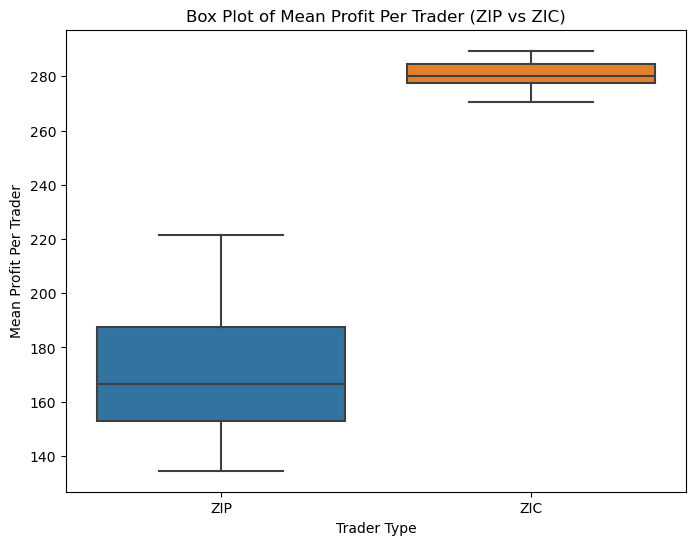

In [115]:
# Set the figure size for consistent plot dimensions
plt.figure(figsize=(8, 6))

# Create a box plot to compare Mean Profit Per Trader for each Trader Type
sns.boxplot(x='Trader Type', y='Mean Profit Per Trader', data=df)
plt.title('Box Plot of Mean Profit Per Trader (ZIP vs ZIC)')
plt.show()

Mean Profit Comparison:
- The box plot shows that the mean profit per trader for ZIC traders is significantly higher than that of ZIP traders. The ZIC group's box is positioned noticeably higher on the y-axis, indicating that their profits are higher on average. 

Variability in Profits:
- ZIP traders show a wider range in profit values with a larger interquartile range and more spread-out values, suggesting more variability in their profit outcomes.
- ZIC traders have a smaller interquartile range and are tightly clustered, showing more consistency in their profit outcomes.

Outliers:
- The ZIP trader group displays several outliers, indicating that the traders achieving higher profits are exceptions rather than the norm.
- The ZIC group, on the other hand, has no visible outliers, indicating a consistent performance across all traders.

The box plot provides visual evidence that ZIC traders outperform ZIP traders in terms of mean profit. Therefore, the data does not support the claim that ZIP traders generate more profit than ZIC traders, instead suggesting the opposite in this setup.

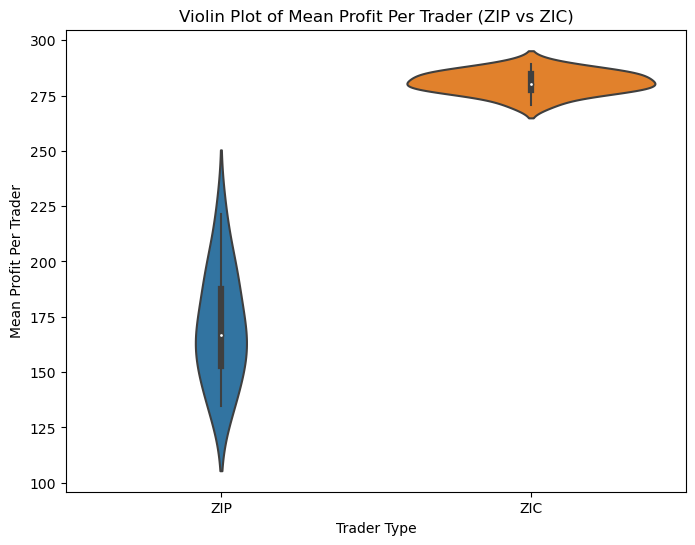

In [116]:
# Set the figure size for consistent plot dimensions
plt.figure(figsize=(8, 6))

# Create a violin plot to compare Mean Profit Per Trader for each Trader Type
sns.violinplot(x='Trader Type', y='Mean Profit Per Trader', data=df)
plt.title('Violin Plot of Mean Profit Per Trader (ZIP vs ZIC)')
plt.show()

Profit Distribution Shape:
- The ZIC traders' distribution is very compact, with most values tightly clustering around the higher mean profit range. This once again reflects high consistency shown clearly with the flat, wide shape.
- The ZIP traders' distribution is much more elongated and spread-out, indicating a wider range of profit values and high variability.

Median:
- The median profit for ZIC traders is visibly higher than that of ZIP traders, which was also observed in the box plot.

Presence of Outliers:
- The violin plot once again reiterates what was seen in with the box plot, showing tails extending further from the median for the ZIP traders, suggesting the presence of more extreme values (potential outliers).

# 5. Statistical Testing

In this section, through the use of the Shapiro-Wilk test, it will be determined if the data was drawn from a normal distribution.
Then following this the problem statement, that "ZIP traders generate more profit than ZIC traders in homogeneous and periodic BSE markets with symmetric demand and supply curves", will be statistically assessed.

### 5.1. Determine Normality

The Shaprio-Wilk test tests the null hypothesis that the data was drawn from a normal distribution. If p-value < 0.05, we reject the null hypothesis, i.e., the data is not drawn from an (approximately) normal distribution If p-value >= 0.05 we cannot reject the null hypothesis that the data is drawn from an approximately normal distribution.

Here, a function is defined, that performs the Shapiro-Wilk test for normality of each of the unique trader types in the DataFrame stated.

In [117]:
def normality_test(df, column, alpha=0.05):
  '''
  Performs the Shapiro-Wilk test for normality on each of the unique trader types in the DataFrame, on specified column data grouped by a categorical variable.

  Args:
      df (pd.DataFrame): The DataFrame containing the data.
      column (str): The name of the column to test for normality.
      alpha (float, optional): Significance level for the test. Defaults to 0.05.

  Returns:
      None: Prints the test results for each unique trader type in the DataFrame.
  '''
  print('Using Shapiro-Wilk test to test the null hypothesis that the data was drawn from a normal distribution:')

  # Loop through each unique trader type in the specified column
  for trader in df['Trader Type'].unique():
    # Extract the data for the current trader type
    trader_type_data = df[df['Trader Type'] == trader][column]

    # Perform the Shapiro-Wilk test for normality
    statistic, pvalue = stats.shapiro(trader_type_data)

    # Interpret the test result based on the significance level
    if pvalue < alpha:
      print(f'{trader} traders: We can reject the null hypothesis (p={pvalue:.2f}). Therefore, data is not normally distributed.')
    else:
      print(f'{trader} traders: We cannot reject the null hypothesis (p={pvalue:.2f}). Therefore, data is normally distributed.')

Now, by using the function defined with the DataFrame containing trader type and mean_profit_per_trader, the Shapiro-Wilk test for normality can be conducted, and determining if the data is or is not normally distributed.

In [118]:
# Conduct the Shapiro-Wilk test for normality on the mean profit per trader data for each of the trader types
normality_test(df, 'Mean Profit Per Trader')

Using Shapiro-Wilk test to test the null hypothesis that the data was drawn from a normal distribution:
ZIP traders: We cannot reject the null hypothesis (p=0.77). Therefore, data is normally distributed.
ZIC traders: We cannot reject the null hypothesis (p=0.94). Therefore, data is normally distributed.


### 5.2. Hypothesis Testing

As stated in the brief, the analysis conducted is to indicate if there is evidence that "ZIP traders generate more profit than ZIC traders in homogeneous and periodic BSE markets with symmetric demand and supply curves". Therefore, the null hypothesis is that ZIP traders do not generate more profit than ZIC traders.

The null hypothesis is ZIP traders generate equal or less profit compared to ZIC traders.

$H_0: \text{mean profit}_{ZIP} \leq \text{mean profit}_{ZIC}$

The Shapiro-Wilk test determined that the data is (approximately) normally distributed. Therefore, a parametric test such as a t-test can be used.

In [119]:
# Perform an independent two-sample t-test on the mean profit per trader between ZIP and ZIC traders to test if there is a significant difference
statistic, pvalue = stats.ttest_ind(
    df[df['Trader Type'] == 'ZIP']['Mean Profit Per Trader'],
    df[df['Trader Type'] == 'ZIC']['Mean Profit Per Trader'],
    equal_var=True
)

# Print the t-statistic and p-value for the t-test
print(f'T-statistic: {statistic:.2f}')
print(f'P-value: {pvalue:.4f}')

# Interpret the test result based on the p-value and a significance level of 0.05
if pvalue < 0.05:
    print('We reject the null hypothesis. It appears that ZIC traders outperform ZIP traders in terms of mean profit.')
else:
    print('We cannot reject the null hypothesis. There is insufficient evidence to conclude that ZIC traders outperform ZIP traders in terms of mean profit.')

T-statistic: -16.81
P-value: 0.0000
We reject the null hypothesis. It appears that ZIC traders outperform ZIP traders in terms of mean profit.


Since the p-value is or effectively is zero, the null hypothesis can be rejected, as it confirms there is a significant difference between the two samples. As the t-statistic indicates the direction, a negative value suggests ZIP is less profitable than ZIC, as ZIP is considered the baseline (first stated) in this test.

As such, the t-test suggests that infact the ZIC traders are more profitable than the ZIP traders.

# 6. Conclusions

The statistical test results indicate that ZIC traders significantly outperform ZIP traders in mean profit under the tested conditions, contrary to the initial hypothesis.

Rejecting the null hypothesis in this case confirms that ZIP traders do not generate more profit — in fact, they generate less profit compared to ZIC traders. This aligns with the result observed in the visuals and provides strong statistical evidence to support that observation.

Through the use of box plots and violin plots, its clear that the mean average profit per trader for the ZIC traders is greater than the ZIP traders. In addition to this, the consistency of the ZIC traders mean profit, and the larger spread in mean profits in the ZIP trader can be clearly seen.

The homogeneous market test conditions for this experiment suggest a relatively stable environment where demand and supply conditions do not vary widely over time. 
ZIP traders have an adaptive algorithm that uses basic rules and feedback from the market conditions to adjust its bid/offer prices incrementally to try to maximise their profits. This adaptability can be beneficial in more volatile or competitive markets, but may lead to inconsistent performance in stable or homogeneous markets.
The ZIC trader is a simpler algorithm that places random bids and offers within a constrained range, and unlike the ZIP traders, does not adjust its strategies based on market outcomes or past trades. As such they can achieve stable and consistent results, because their strategy does not depend on market feedback.
In a homogeneous market, the adaptability of ZIP traders may not be as beneficial as there is limited variation to adapt to. ZIC traders, on the other hand, avoid overreacting to market noise in homogeneous, predictable markets, and their simple strategy yields steady profits.

Symmetric demand and supply curves imply a balanced market with equal pressure from buyers and sellers, which can favour simple strategies. ZIP traders constant adjustments may be less effective as there are fewer extreme opportunities for profit adjustments are available. 
ZIC traders, on the other hand, may benefit from a symmetric market since their fixed strategy is well-suited to stable conditions, leading to consistent profits without needing to adapt to changing supply and demand.

In conclusion, in this particular market configuration, the results showing higher profitability and consistency for ZIC traders over ZIP traders makes sense. The ZIC traders simple and consistent strategy aligns well to the homogeneous and balanced market, while the adaptive native of ZIP traders appears less effective.
This suggests that in more dynamic or competitive markets ZIP traders might perform better, but ZIC traders excel in stable, balanced conditions.